
# SP2 Plots For SAIL events

---

## Overview

This notebook will introduce the basics of gridded, labeled data with Xarray. Since Xarray introduces additional abstractions on top of plain arrays of data, our goal is to show why these abstractions are useful and how they frequently lead to simpler, more robust code.

We'll cover these topics:

1. Create a `DataArray`, one of the core object types in Xarray
1. Understand how to use named coordinates and metadata in a `DataArray`
1. Combine individual `DataArrays` into a `Dataset`, the other core object type in Xarray
1. Subset, slice, and interpolate the data using named coordinates
1. Open netCDF data using XArray
1. Basic subsetting and aggregation of a `Dataset`
1. Brief introduction to plotting with Xarray

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Necessary |  |
| [Intermediate NumPy](https://foundations.projectpythia.org/core/numpy/intermediate-numpy.html) | Helpful | Familiarity with indexing and slicing arrays |
| [NumPy Broadcasting](https://foundations.projectpythia.org/core/numpy/numpy-broadcasting.html) | Helpful | Familiar with array arithmetic and broadcasting |
| [Introduction to Pandas](https://foundations.projectpythia.org/core/pandas/pandas) | Helpful | Familiarity with labeled data |
| [Datetime](https://foundations.projectpythia.org/core/datetime/datetime) | Helpful | Familiarity with time formats and the `timedelta` object |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |

- **Time to learn**: 30 minutes

---

## Imports

Simmilar to `numpy`, `np`; `pandas`, `pd`; you may often encounter `xarray` imported within a shortened namespace as `xr`.

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Introducing the `DataArray` and `Dataset`

Xarray expands on the capabilities on NumPy arrays, providing a lot of streamlined data manipulation. It is similar in that respect to Pandas, but whereas Pandas excels at working with tabular data, Xarray is focused on N-dimensional arrays of data (i.e. grids). Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces to provide functionality similar to netCDF-java's [Common Data Model (CDM)](https://docs.unidata.ucar.edu/netcdf-java/current/userguide/common_data_model_overview.html). 

###                           For event #1 Jan2-7 2022

###For Event #3

In [106]:
# Set your username and token here!
username = 'adriancortessantos'
token = '<https://adc.arm.gov/armlive/livedata/home>`_.'

# Set the datastream and start/enddates
datastream = 'gucaossp2bc60sS2.b1'
startdate = '2022-01-02'
enddate = '2022-01-08'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_sp2 = act.io.read_arm_netcdf(result)

[DOWNLOADING] gucaossp2bc60sS2.b1.20220102.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220103.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220104.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220105.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220106.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220107.000000.nc

If you use these data to prepare a publication, please cite:

Jackson, R., Sedlacek, A., Salwen, C., & Hayes, C. Single Particle Soot
Photometer (AOSSP2BC60S). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1807910



In [81]:
print(ds_sp2)

<xarray.Dataset> Size: 68MB
Dimensions:       (time: 14160, bound: 2, bin: 199)
Coordinates:
  * time          (time) datetime64[ns] 113kB 2022-01-20T00:00:00.617000 ... ...
  * bin           (bin) float64 2kB 0.0125 0.0175 0.0225 ... 0.9925 0.9975 1.002
Dimensions without coordinates: bound
Data variables:
    base_time     (time) datetime64[ns] 113kB 2022-01-20 ... 2022-01-29
    time_offset   (time) datetime64[ns] 113kB 2022-01-20T00:00:00.617000 ... ...
    time_bounds   (time, bound) object 227kB dask.array<chunksize=(1416, 2), meta=np.ndarray>
    bin_bounds    (time, bin, bound) float64 45MB dask.array<chunksize=(1416, 199, 2), meta=np.ndarray>
    sp2_rbc_conc  (time) float64 113kB dask.array<chunksize=(1416,), meta=np.ndarray>
    sp2_cnts      (time, bin) float64 23MB dask.array<chunksize=(1416, 199), meta=np.ndarray>
    lat           (time) float32 57kB 38.9 38.9 38.9 38.9 ... 38.9 38.9 38.9
    lon           (time) float32 57kB -106.9 -106.9 -106.9 ... -106.9 -106.9
    al

Plot rBc Concentration with xarray

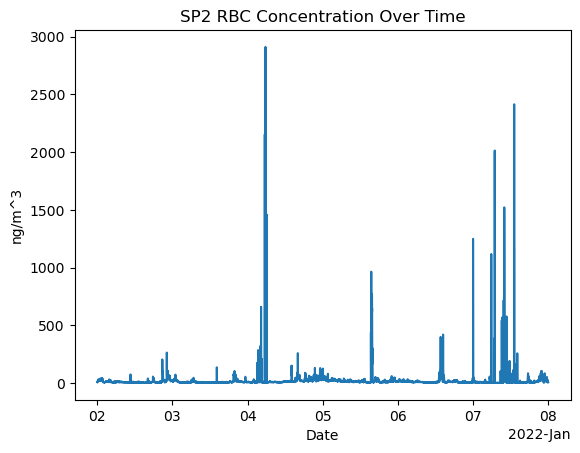

In [107]:
import xarray as xr
import matplotlib.pyplot as plt


# Assuming you have already loaded your dataset as sp2_ds
# Plot the sp2_rbc_conc over time
ds_sp2['sp2_rbc_conc'].plot()
plt.title('SP2 RBC Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('ng/m^3')
plt.show()


Apply Date-night highlight

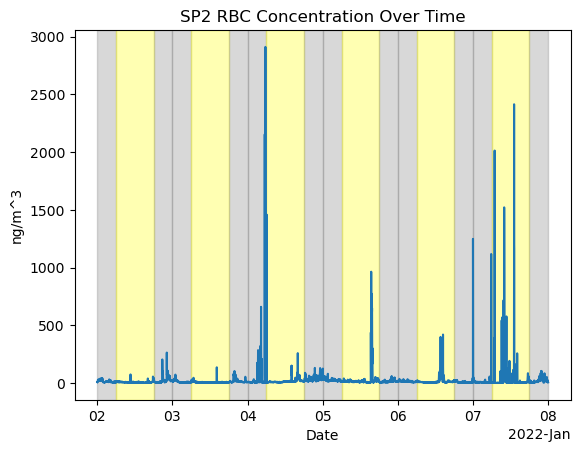

In [108]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset as sp2_ds
# Plot the sp2_rbc_conc over time
fig, ax = plt.subplots()
ds_sp2['sp2_rbc_conc'].plot(ax=ax)
ax.set_title('SP2 RBC Concentration Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('ng/m^3')

# Define day and night periods (assuming 6 AM to 6 PM as day)
day_start = 6   # 6 AM
day_end = 18    # 6 PM

# Shade periods for each day in the dataset
date_range = pd.date_range(ds_sp2['time'].min().values, ds_sp2['time'].max().values, freq='D')

for date in date_range:
    # Night period before day start
    ax.axvspan(date, date + pd.Timedelta(hours=day_start), color='grey', alpha=0.3)
    # Day period
    ax.axvspan(date + pd.Timedelta(hours=day_start), date + pd.Timedelta(hours=day_end), color='yellow', alpha=0.3)
    # Night period after day end
    ax.axvspan(date + pd.Timedelta(hours=day_end), date + pd.Timedelta(hours=24), color='grey', alpha=0.3)

plt.show()

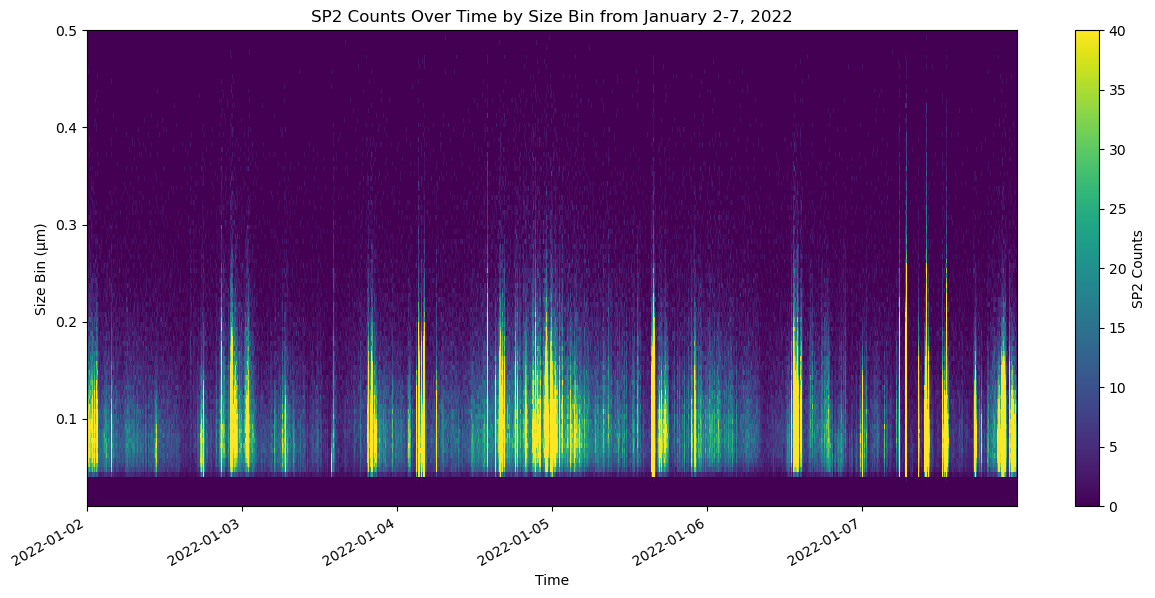

In [109]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ds_sp2' is already loaded and 'sp2_cnts' is computed
sp2_cnts = ds_sp2['sp2_cnts'].compute()

# Convert 'time' to a regular NumPy array of datetime objects for compatibility
times = ds_sp2['time'].values
bins = ds_sp2['bin'].values

# Filter bins and sp2_cnts for bins <= 0.6 micrometers
mask = bins <= 0.5
filtered_bins = bins[mask]
filtered_sp2_cnts = sp2_cnts[:, mask]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))
# Use meshgrid to create 2D grid coordinates for times and filtered bins, necessary for pcolormesh
T, B = np.meshgrid(times, filtered_bins)
# Plot with specified color scale range
c = ax.pcolormesh(T, B, filtered_sp2_cnts.T, shading='auto', vmin=0, vmax=40)  # Set color scale limits here

# Adding a colorbar to represent the concentration scales
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('SP2 Counts')

# Customization of the plot
ax.set_title('SP2 Counts Over Time by Size Bin from January 2-7, 2022')
ax.set_xlabel('Time')
ax.set_ylabel('Size Bin (μm)')

# Format x-axis to handle datetime objects nicely
plt.gcf().autofmt_xdate()  # Auto format date labels

plt.show()

### For Event 2 Jan 20-30

In [94]:
# Set your username and token here!
username = 'adriancortessantos'
token = '<https://adc.arm.gov/armlive/livedata/home>`_.'

# Set the datastream and start/enddates
datastream = 'gucaossp2bc60sS2.b1'
startdate = '2022-01-20'
enddate = '2022-01-30'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_sp2 = act.io.read_arm_netcdf(result)

[DOWNLOADING] gucaossp2bc60sS2.b1.20220120.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220122.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220121.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220124.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220123.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220128.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220125.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220126.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220127.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220129.000000.nc

If you use these data to prepare a publication, please cite:

Jackson, R., Sedlacek, A., Salwen, C., & Hayes, C. Single Particle Soot
Photometer (AOSSP2BC60S). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1807910



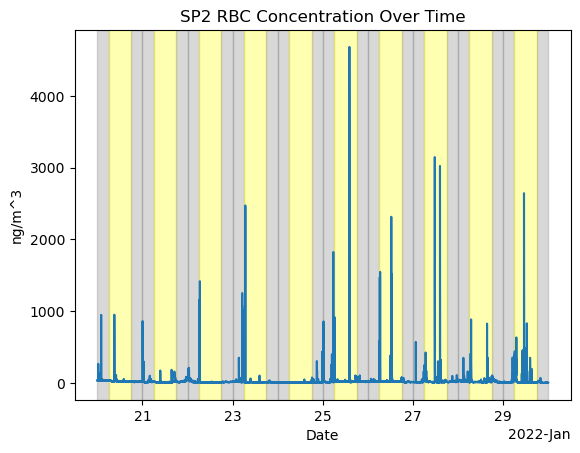

In [95]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset as sp2_ds
# Plot the sp2_rbc_conc over time
fig, ax = plt.subplots()
ds_sp2['sp2_rbc_conc'].plot(ax=ax)
ax.set_title('SP2 RBC Concentration Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('ng/m^3')

# Define day and night periods (assuming 6 AM to 6 PM as day)
day_start = 6   # 6 AM
day_end = 18    # 6 PM

# Shade periods for each day in the dataset
date_range = pd.date_range(ds_sp2['time'].min().values, ds_sp2['time'].max().values, freq='D')

for date in date_range:
    # Night period before day start
    ax.axvspan(date, date + pd.Timedelta(hours=day_start), color='grey', alpha=0.3)
    # Day period
    ax.axvspan(date + pd.Timedelta(hours=day_start), date + pd.Timedelta(hours=day_end), color='yellow', alpha=0.3)
    # Night period after day end
    ax.axvspan(date + pd.Timedelta(hours=day_end), date + pd.Timedelta(hours=24), color='grey', alpha=0.3)

plt.show()

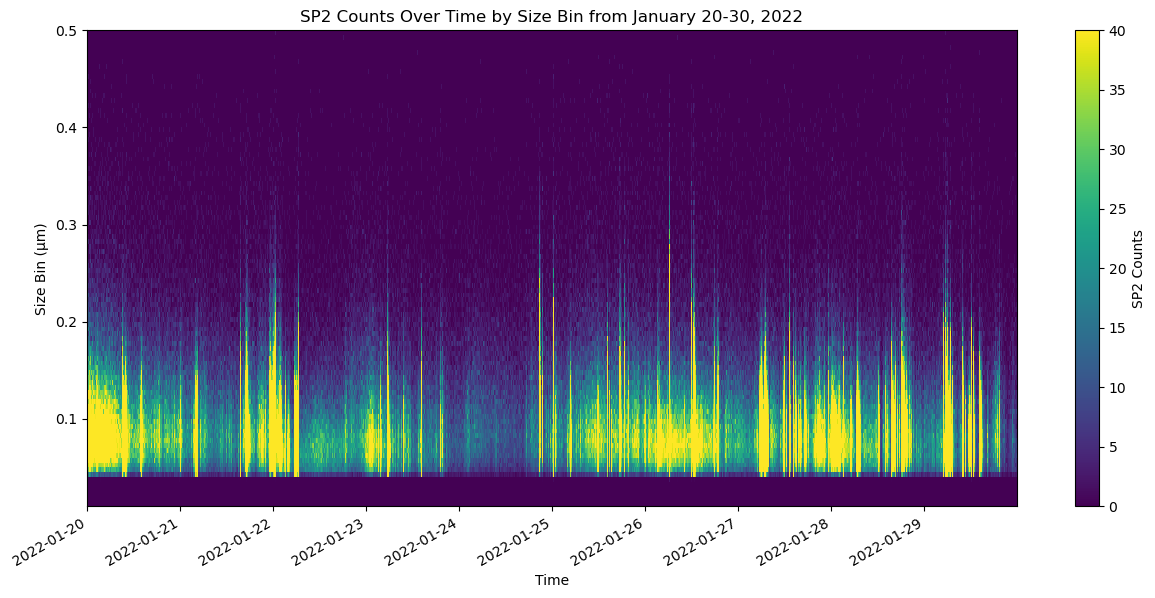

In [96]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ds_sp2' is already loaded and 'sp2_cnts' is computed
sp2_cnts = ds_sp2['sp2_cnts'].compute()

# Convert 'time' to a regular NumPy array of datetime objects for compatibility
times = ds_sp2['time'].values
bins = ds_sp2['bin'].values

# Filter bins and sp2_cnts for bins <= 0.6 micrometers
mask = bins <= 0.5
filtered_bins = bins[mask]
filtered_sp2_cnts = sp2_cnts[:, mask]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))
# Use meshgrid to create 2D grid coordinates for times and filtered bins, necessary for pcolormesh
T, B = np.meshgrid(times, filtered_bins)
# Plot with specified color scale range
c = ax.pcolormesh(T, B, filtered_sp2_cnts.T, shading='auto', vmin=0, vmax=40)  # Set color scale limits here

# Adding a colorbar to represent the concentration scales
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('SP2 Counts')

# Customization of the plot
ax.set_title('SP2 Counts Over Time by Size Bin from January 20-30, 2022')
ax.set_xlabel('Time')
ax.set_ylabel('Size Bin (μm)')

# Format x-axis to handle datetime objects nicely
plt.gcf().autofmt_xdate()  # Auto format date labels

plt.show()

### For event 3  Apr3-8 2022

In [97]:
# Set your username and token here!
username = 'adriancortessantos'
token = '<https://adc.arm.gov/armlive/livedata/home>`_.'

# Set the datastream and start/enddates
datastream = 'gucaossp2bc60sS2.b1'
startdate = '2022-04-03'
enddate = '2022-04-08'


# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_sp2 = act.io.read_arm_netcdf(result)

[DOWNLOADING] gucaossp2bc60sS2.b1.20220403.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220406.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220404.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220405.000000.nc
[DOWNLOADING] gucaossp2bc60sS2.b1.20220407.000000.nc

If you use these data to prepare a publication, please cite:

Jackson, R., Sedlacek, A., Salwen, C., & Hayes, C. Single Particle Soot
Photometer (AOSSP2BC60S). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1807910



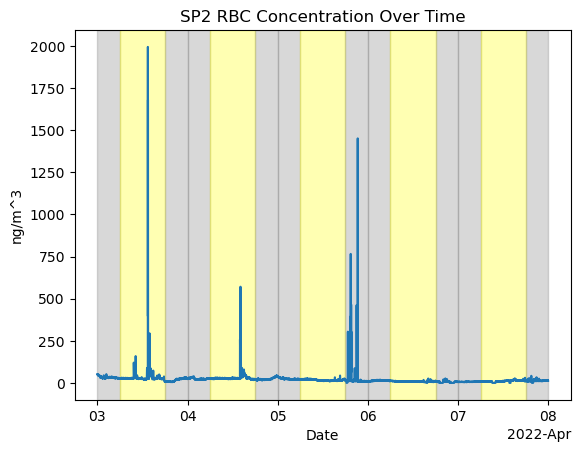

In [98]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset as sp2_ds
# Plot the sp2_rbc_conc over time
fig, ax = plt.subplots()
ds_sp2['sp2_rbc_conc'].plot(ax=ax)
ax.set_title('SP2 RBC Concentration Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('ng/m^3')

# Define day and night periods (assuming 6 AM to 6 PM as day)
day_start = 6   # 6 AM
day_end = 18    # 6 PM

# Shade periods for each day in the dataset
date_range = pd.date_range(ds_sp2['time'].min().values, ds_sp2['time'].max().values, freq='D')

for date in date_range:
    # Night period before day start
    ax.axvspan(date, date + pd.Timedelta(hours=day_start), color='grey', alpha=0.3)
    # Day period
    ax.axvspan(date + pd.Timedelta(hours=day_start), date + pd.Timedelta(hours=day_end), color='yellow', alpha=0.3)
    # Night period after day end
    ax.axvspan(date + pd.Timedelta(hours=day_end), date + pd.Timedelta(hours=24), color='grey', alpha=0.3)

plt.show()

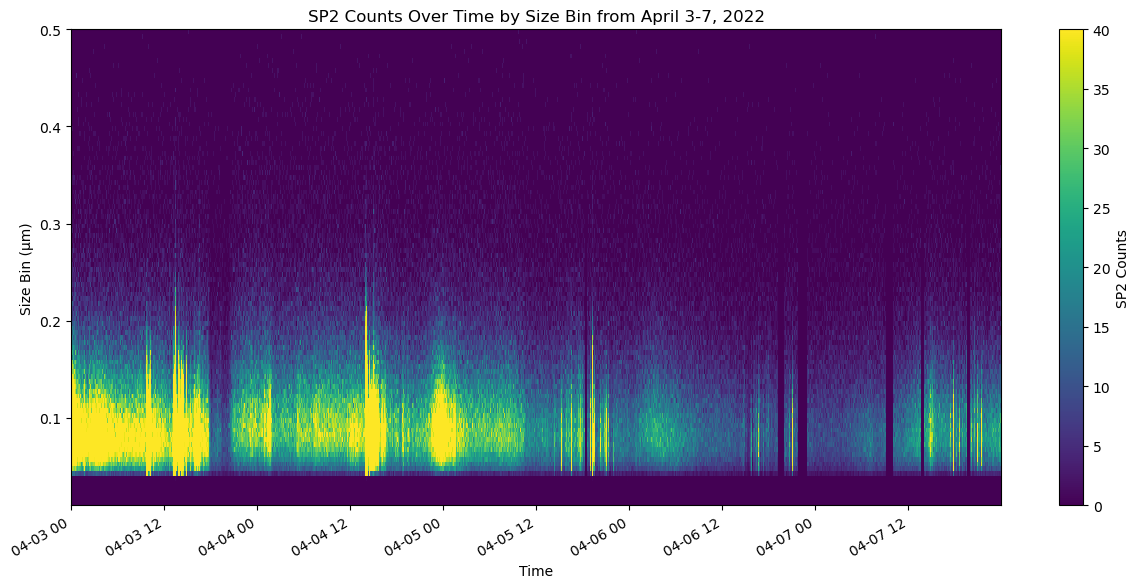

In [100]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ds_sp2' is already loaded and 'sp2_cnts' is computed
sp2_cnts = ds_sp2['sp2_cnts'].compute()

# Convert 'time' to a regular NumPy array of datetime objects for compatibility
times = ds_sp2['time'].values
bins = ds_sp2['bin'].values

# Filter bins and sp2_cnts for bins <= 0.6 micrometers
mask = bins <= 0.5
filtered_bins = bins[mask]
filtered_sp2_cnts = sp2_cnts[:, mask]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))
# Use meshgrid to create 2D grid coordinates for times and filtered bins, necessary for pcolormesh
T, B = np.meshgrid(times, filtered_bins)
# Plot with specified color scale range
c = ax.pcolormesh(T, B, filtered_sp2_cnts.T, shading='auto', vmin=0, vmax=40)  # Set color scale limits here

# Adding a colorbar to represent the concentration scales
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('SP2 Counts')

# Customization of the plot
ax.set_title('SP2 Counts Over Time by Size Bin from April 3-7, 2022')
ax.set_xlabel('Time')
ax.set_ylabel('Size Bin (μm)')

# Format x-axis to handle datetime objects nicely
plt.gcf().autofmt_xdate()  # Auto format date labels

plt.show()